<a href="https://colab.research.google.com/github/erstrong/DeepNeuralNetworksandAI/blob/master/exp_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os, zipfile, io, requests
URL = 'http://cs231n.stanford.edu/tiny-imagenet-200.zip'
def download_images(url):
    r = requests.get(url, stream=True)
    print ('Downloading ' + url )
    zip_ref = zipfile.ZipFile(io.BytesIO(r.content))
    zip_ref.extractall('./')
    zip_ref.close()
download_images(URL) #To download

In [0]:
import numpy as np
from PIL import Image
import six.moves.cPickle as pickle

data = {}
data['train'] = {}
data['test'] = {}
data['train']['data'] = []
data['train']['target'] = []
data['test']['data'] = []
data['test']['target'] = []
size = (32, 32)
N = 400 ##400 as testing and 100 as training in each class

wnids = list(map(lambda x: x.strip(), open('tiny-imagenet-200/wnids.txt').readlines()))

for i in range(len(wnids)):
    wnid = wnids[i]
    print ("{}: {} / {}".format(wnid, i + 1, len(wnids)))
    for j in range(500):
        path = "tiny-imagenet-200/train/{0}/images/{0}_{1}.JPEG".format(wnid, j)
        image = (Image.open(path).convert('RGB'))
        image = image.resize(size, Image.ANTIALIAS)
        image = np.array(image)
        if j < N:
            data['train']['data'].append(image)
            data['train']['target'].append(i)
        else:
            data['test']['data'].append(image)
            data['test']['target'].append(i)
            

print ("Dump to train.pkl...")
pickle.dump(data, open('train.pkl', 'wb', -1))

In [0]:
(train_images, train_labels,val_images,val_labels)=(data['train']['data'],data['train']['target'],data['test']['data'],data['test']['target'])


In [0]:
from keras.models import Model
from keras.layers import Flatten, Dense,Dropout,Input

#import register_converters as _register_converters
from keras.preprocessing import image
from keras.applications.mobilenetv2 import MobileNetV2

input_tensor = Input(shape=(32, 32, 3))

base_model = MobileNetV2(
        include_top=False,
        weights='imagenet',
        input_tensor=input_tensor,
        
        pooling='avg')

#for layer in base_model.layers:
 #       layer.trainable = True
    
  

x = Dense(4096, activation='relu')(base_model.output)
x = Dense(4096, activation='relu')(x)

x = Dense(200, activation = 'softmax')(x)


model = Model(inputs = base_model.input, outputs = x)

model.summary()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/keras_applications/mobilenet_v2.py:295: UserWarning: MobileNet shape is undefined. Weights for input shape(224, 224) will be loaded.
  warnings.warn('MobileNet shape is undefined.'


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 33, 33, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 16, 16, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 16, 16, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu

In [0]:
import keras
import numpy as np
num_classes=200

train_images = np.array(train_images)
val_images = np.array(val_images)




In [0]:
import keras

train_images = train_images.astype('float32')



val_images = val_images.astype('float32')

In [0]:
train_images =train_images/255


val_images = val_images/255

In [0]:
train_labels = keras.utils.to_categorical(train_labels, num_classes)



val_labels = keras.utils.to_categorical(val_labels, num_classes)

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop(lr=0.0001, rho=0.9, epsilon=None, decay=0.0),
              metrics=['accuracy'])

In [0]:
history = model.fit(train_images, train_labels,
                    batch_size=256,
                    epochs=10,
                    verbose=1,
                    validation_data=(val_images, val_labels))

Instructions for updating:
Use tf.cast instead.
Train on 80000 samples, validate on 20000 samples
Epoch 1/10
80000/80000 [==============================] - 59s 736us/step - loss: 4.5978 - acc: 0.0794 - val_loss: 4.2017 - val_acc: 0.1311
Epoch 2/10
80000/80000 [==============================] - 49s 612us/step - loss: 3.6990 - acc: 0.1849 - val_loss: 3.9914 - val_acc: 0.1676
Epoch 3/10
80000/80000 [==============================] - 49s 615us/step - loss: 3.2438 - acc: 0.2563 - val_loss: 3.8506 - val_acc: 0.1879
Epoch 4/10
80000/80000 [==============================] - 49s 612us/step - loss: 2.8775 - acc: 0.3205 - val_loss: 3.7745 - val_acc: 0.2017
Epoch 5/10
80000/80000 [==============================] - 49s 612us/step - loss: 2.5371 - acc: 0.3848 - val_loss: 3.7488 - val_acc: 0.2127
Epoch 6/10
80000/80000 [==============================] - 49s 613us/step - loss: 2.2265 - acc: 0.4482 - val_loss: 3.8278 - val_acc: 0.2154
Epoch 7/10
80000/80000 [==============================] - 49s 613us/

Test loss: 4.336063533782959
Test accuracy: 0.2139
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


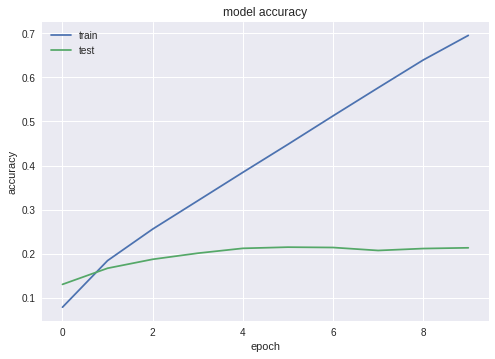

In [0]:
score = model.evaluate((val_images),(val_labels), verbose=0)
                       
print('Test loss:', score[0])
print('Test accuracy:', score[1])


import matplotlib.pyplot as plt
import numpy

print(history.history.keys())
#summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc']) 
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
from keras.models import Model
from keras.layers import Flatten, Dense,Dropout,Input

#import register_converters as _register_converters
from keras.preprocessing import image
from keras.applications.mobilenetv2 import MobileNetV2

input_tensor = Input(shape=(32, 32, 3))

base_model = MobileNetV2(
        include_top=False,
        weights='imagenet',
        input_tensor=input_tensor,
        
        pooling='avg')

#for layer in base_model.layers:
 #       layer.trainable = True
    
  

x = Dense(4096, activation='relu')(base_model.output)
x = Dropout(0.5)(x)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(200, activation = 'softmax')(x)


model = Model(inputs = base_model.input, outputs = x)

model.summary()

/usr/local/lib/python3.6/dist-packages/keras_applications/mobilenet_v2.py:295: UserWarning: MobileNet shape is undefined. Weights for input shape(224, 224) will be loaded.
  warnings.warn('MobileNet shape is undefined.'


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 33, 33, 3)    0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 16, 16, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 16, 16, 32)   128         Conv1[0][0]                 

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop(lr=0.0001, rho=0.9, epsilon=None, decay=0.0),
              metrics=['accuracy'])

In [0]:
history = model.fit(train_images, train_labels,
                    batch_size=256,
                    epochs=10,
                    verbose=1,
                    validation_data=(val_images, val_labels))

Train on 80000 samples, validate on 20000 samples
Epoch 1/10
80000/80000 [==============================] - 57s 718us/step - loss: 5.1607 - acc: 0.0262 - val_loss: 4.5371 - val_acc: 0.0835
Epoch 2/10
80000/80000 [==============================] - 49s 608us/step - loss: 4.3562 - acc: 0.0982 - val_loss: 4.0870 - val_acc: 0.1376
Epoch 3/10
80000/80000 [==============================] - 49s 607us/step - loss: 3.8834 - acc: 0.1545 - val_loss: 3.9340 - val_acc: 0.1725
Epoch 4/10
80000/80000 [==============================] - 49s 608us/step - loss: 3.5655 - acc: 0.2014 - val_loss: 3.7840 - val_acc: 0.1903
Epoch 5/10
80000/80000 [==============================] - 48s 606us/step - loss: 3.3314 - acc: 0.2395 - val_loss: 3.6456 - val_acc: 0.2117
Epoch 6/10
80000/80000 [==============================] - 49s 607us/step - loss: 3.1359 - acc: 0.2727 - val_loss: 3.5211 - val_acc: 0.2273
Epoch 7/10
80000/80000 [==============================] - 48s 605us/step - loss: 2.9618 - acc: 0.3043 - val_loss: 3.

Test loss: 3.428998860359192
Test accuracy: 0.25255
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


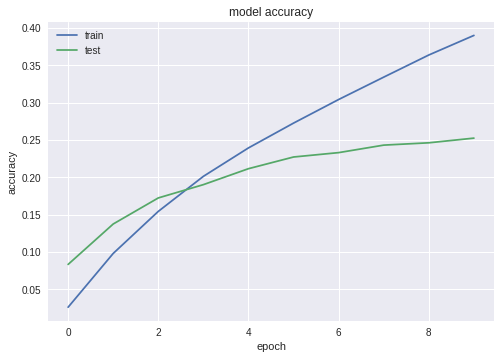

In [0]:
score = model.evaluate((val_images),(val_labels), verbose=0)
                       
print('Test loss:', score[0])
print('Test accuracy:', score[1])


import matplotlib.pyplot as plt
import numpy

print(history.history.keys())
#summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc']) 
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
from keras.models import Model
from keras.layers import Flatten, Dense,Dropout,Input

#import register_converters as _register_converters
from keras.preprocessing import image
from keras.applications.mobilenetv2 import MobileNetV2

input_tensor = Input(shape=(32, 32, 3))

base_model = MobileNetV2(
        include_top=False,
        weights='imagenet',
        input_tensor=input_tensor,
        
        pooling='avg')

#for layer in base_model.layers:
 #       layer.trainable = True
    
  

x = Dense(4096, activation='relu')(base_model.output)
x = Dropout(0.5)(x)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(200, activation = 'softmax')(x)


model = Model(inputs = base_model.input, outputs = x)

model.summary()

/usr/local/lib/python3.6/dist-packages/keras_applications/mobilenet_v2.py:295: UserWarning: MobileNet shape is undefined. Weights for input shape(224, 224) will be loaded.
  warnings.warn('MobileNet shape is undefined.'


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 33, 33, 3)    0           input_4[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 16, 16, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 16, 16, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop(lr=0.0001, rho=0.9, epsilon=None, decay=0.0),
              metrics=['accuracy'])

In [0]:
history = model.fit(train_images, train_labels,
                    batch_size=512,
                    epochs=25,
                    verbose=1,
                    validation_data=(val_images, val_labels))

Train on 80000 samples, validate on 20000 samples
Epoch 1/25
80000/80000 [==============================] - 51s 635us/step - loss: 5.2777 - acc: 0.0168 - val_loss: 4.8553 - val_acc: 0.0576
Epoch 2/25
80000/80000 [==============================] - 37s 468us/step - loss: 4.6338 - acc: 0.0706 - val_loss: 4.2093 - val_acc: 0.1174
Epoch 3/25
80000/80000 [==============================] - 37s 469us/step - loss: 4.1138 - acc: 0.1239 - val_loss: 4.0545 - val_acc: 0.1446
Epoch 4/25
80000/80000 [==============================] - 37s 468us/step - loss: 3.7908 - acc: 0.1670 - val_loss: 3.9125 - val_acc: 0.1706
Epoch 5/25
80000/80000 [==============================] - 37s 468us/step - loss: 3.5366 - acc: 0.2055 - val_loss: 3.8116 - val_acc: 0.1865
Epoch 6/25
80000/80000 [==============================] - 37s 465us/step - loss: 3.3266 - acc: 0.2399 - val_loss: 3.7134 - val_acc: 0.1996
Epoch 7/25
80000/80000 [==============================] - 37s 467us/step - loss: 3.1379 - acc: 0.2737 - val_loss: 3.

Test loss: 4.592374450683594
Test accuracy: 0.23335
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


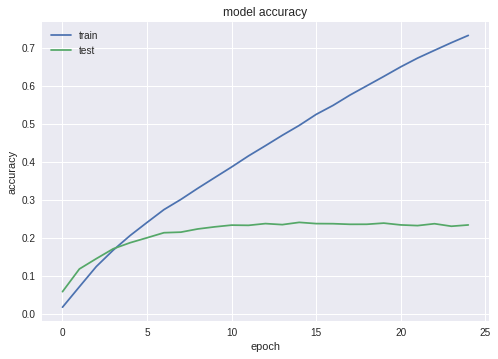

In [0]:
score = model.evaluate((val_images),(val_labels), verbose=0)
                       
print('Test loss:', score[0])
print('Test accuracy:', score[1])


import matplotlib.pyplot as plt
import numpy

print(history.history.keys())
#summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc']) 
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
from keras.models import Model
from keras.layers import Flatten, Dense,Dropout,Input

#import register_converters as _register_converters
from keras.preprocessing import image
from keras.applications.mobilenetv2 import MobileNetV2

input_tensor = Input(shape=(32, 32, 3))

base_model = MobileNetV2(
        include_top=False,
        weights='imagenet',
        input_tensor=input_tensor,
        
        pooling='avg')

#for layer in base_model.layers:
 #       layer.trainable = True
    
  

x = Dense(4096, activation='relu')(base_model.output)
x = Dropout(0.5)(x)

x = Dense(200, activation = 'softmax')(x)


model = Model(inputs = base_model.input, outputs = x)

model.summary()

/usr/local/lib/python3.6/dist-packages/keras_applications/mobilenet_v2.py:295: UserWarning: MobileNet shape is undefined. Weights for input shape(224, 224) will be loaded.
  warnings.warn('MobileNet shape is undefined.'


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 33, 33, 3)    0           input_5[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 16, 16, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 16, 16, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop(lr=0.0001, rho=0.9, epsilon=None, decay=0.0),
              metrics=['accuracy'])

In [0]:
history = model.fit(train_images, train_labels,
                    batch_size=256,
                    epochs=25,
                    verbose=1,
                    validation_data=(val_images, val_labels))

Train on 80000 samples, validate on 20000 samples
Epoch 1/25
80000/80000 [==============================] - 56s 705us/step - loss: 5.0193 - acc: 0.0430 - val_loss: 4.3275 - val_acc: 0.1061
Epoch 2/25
80000/80000 [==============================] - 40s 503us/step - loss: 4.0922 - acc: 0.1317 - val_loss: 4.0505 - val_acc: 0.1542
Epoch 3/25
80000/80000 [==============================] - 40s 499us/step - loss: 3.6233 - acc: 0.1957 - val_loss: 3.9407 - val_acc: 0.1789
Epoch 4/25
80000/80000 [==============================] - 40s 498us/step - loss: 3.3069 - acc: 0.2440 - val_loss: 3.7345 - val_acc: 0.2136
Epoch 5/25
80000/80000 [==============================] - 40s 499us/step - loss: 3.0480 - acc: 0.2874 - val_loss: 3.6225 - val_acc: 0.2190
Epoch 6/25
80000/80000 [==============================] - 40s 499us/step - loss: 2.8244 - acc: 0.3281 - val_loss: 3.6292 - val_acc: 0.2256
Epoch 7/25
80000/80000 [==============================] - 40s 498us/step - loss: 2.6208 - acc: 0.3661 - val_loss: 3.

Test loss: 4.836655910682678
Test accuracy: 0.2435
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


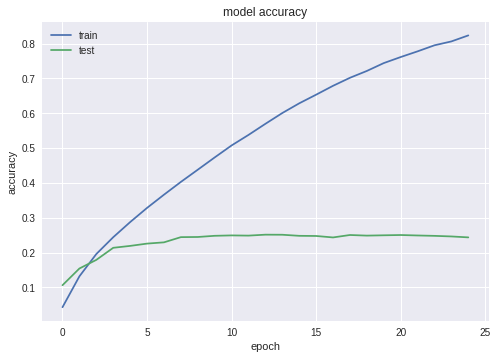

In [0]:
score = model.evaluate((val_images),(val_labels), verbose=0)
                       
print('Test loss:', score[0])
print('Test accuracy:', score[1])


import matplotlib.pyplot as plt
import numpy

print(history.history.keys())
#summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc']) 
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()